<a href="https://colab.research.google.com/github/dinilsonpedroza/Jupyter/blob/main/A%C3%A7%C3%B5esxseguran%C3%A7a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Vamos estudar a importância da diversificação.

In [56]:
import numpy as np ### baixando pacotes necessários a este trabalho.
import pandas as pd
from pandas_datareader import data as web
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
! pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
yf.pdr_override()

In [ ]:
ibov = web.get_data_yahoo('^BVSP')

[*********************100%***********************]  1 of 1 completed


In [ ]:
ibov.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-02,100785.000000,104218.000000,100785.000000,103815.000000,103815.000000,14846500
2021-12-03,104466.000000,104466.000000,104466.000000,104466.000000,104466.000000,14581500
2021-12-06,105070.000000,107498.000000,105070.000000,106859.000000,106859.000000,11127500
2021-12-07,106868.000000,108655.000000,106868.000000,107628.000000,107628.000000,11773100
2021-12-08,107557.671875,108520.820312,107308.601562,107746.453125,107746.453125,0


In [ ]:
ML = wb.DataReader("MGLU3.SA", data_source ='yahoo', start = '2019-1-1') ### pegando ações da Magazine Luiza.

[*********************100%***********************]  1 of 1 completed


In [ ]:
ML.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-02,6.95,7.19,6.45,6.76,6.76,173860500
2021-12-03,6.78,7.28,6.72,7.05,7.05,141729400
2021-12-06,7.15,7.44,7.10,7.30,7.30,84613800
2021-12-07,7.49,7.71,7.37,7.70,7.70,64478800
2021-12-08,7.56,7.57,6.81,6.87,6.87,137519100


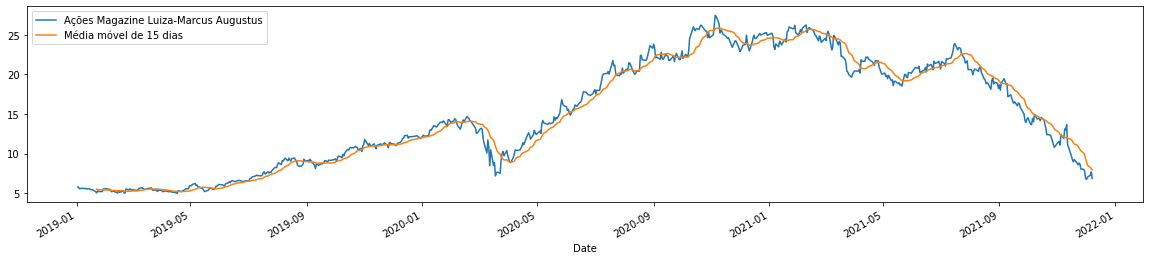

In [30]:
ML['Close'].plot(figsize=(20,4), label = "Ações Magazine Luiza-Marcus Augustus") ### gráfico do preço de fechamento das ações da Magazine Luiza.
ML['Close'].rolling(15).mean().plot(label = "Média móvel de 15 dias")
plt.legend()

In [40]:
tickers =["^BVSP", "USDBRL=X"]
comp = web.get_data_yahoo(tickers, start = '2019-1-1')['Close']

[*********************100%***********************]  2 of 2 completed


In [41]:
comp.head()

,USDBRL=X,^BVSP
Date,,
2019-01-01,3.8800,NaN
2019-01-02,3.8799,91012.0
2019-01-03,3.7863,91564.0
2019-01-04,3.7551,91841.0
2019-01-07,3.6612,91699.0


In [50]:
comp.tail()

,USDBRL=X,^BVSP
Date,,
2021-12-02,5.691567,103815.000000
2021-12-03,5.643322,104466.000000
2021-12-06,5.650099,106859.000000
2021-12-07,5.688000,107628.000000
2021-12-08,5.546200,107718.320312


In [52]:
comp=comp.dropna()

In [53]:
comp.columns = ["Dólar", "IBOVESPA"]

In [54]:
comp.tail()

,Dólar,IBOVESPA
Date,,
2021-12-02,5.691567,103815.000000
2021-12-03,5.643322,104466.000000
2021-12-06,5.650099,106859.000000
2021-12-07,5.688000,107628.000000
2021-12-08,5.546200,107718.320312


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f61b27ebc50>,
      dtype=object)

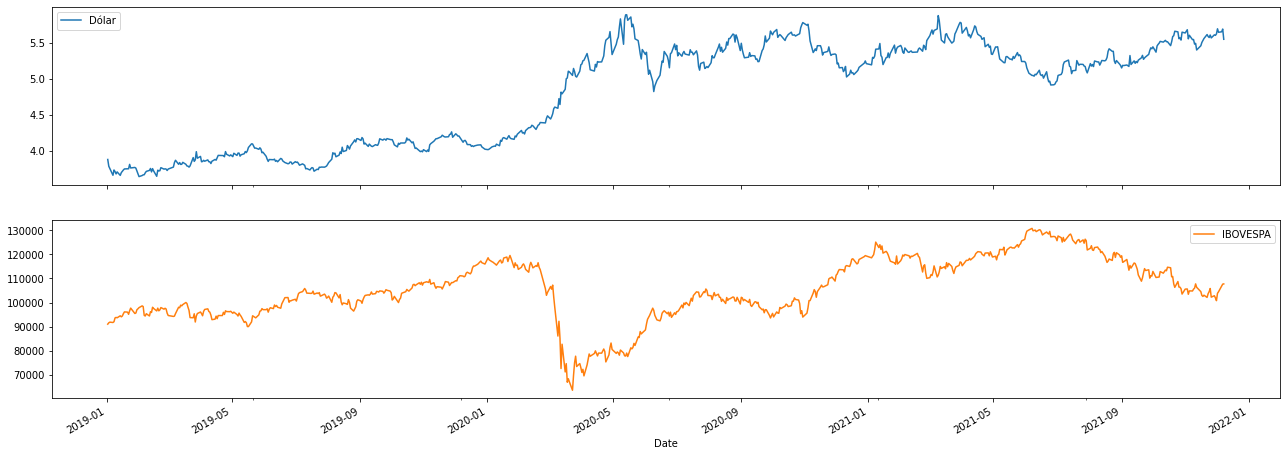

In [55]:
comp.plot(subplots=True, figsize=(22,8))

In [57]:
comp.corr()

,Dólar,IBOVESPA
Dólar,1.000000,0.172459
IBOVESPA,0.172459,1.000000


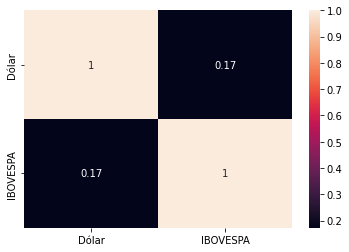

In [60]:
sns.heatmap(comp.corr(), annot=True)

In [47]:
comppct=comp.pct_change()

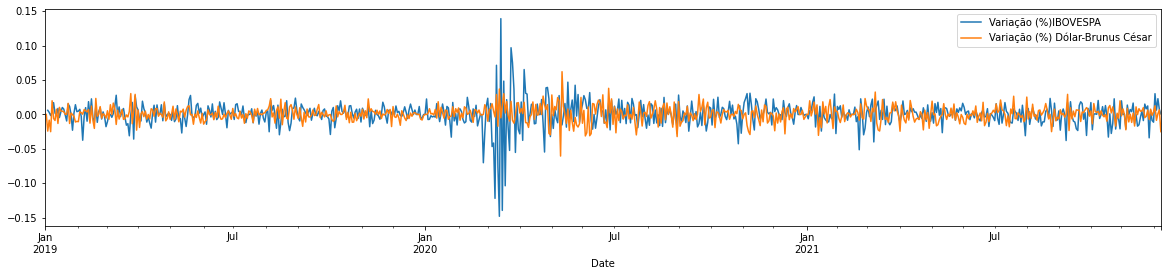

In [49]:
comppct['^BVSP'].plot(figsize=(20,4), label = "Variação (%)IBOVESPA") ### gráfico do preço de fechamento das ações da Magazine Luiza.
comppct['USDBRL=X'].plot(label = "Variação (%) Dólar-Brunus César")
plt.legend()

AttributeError: ignored

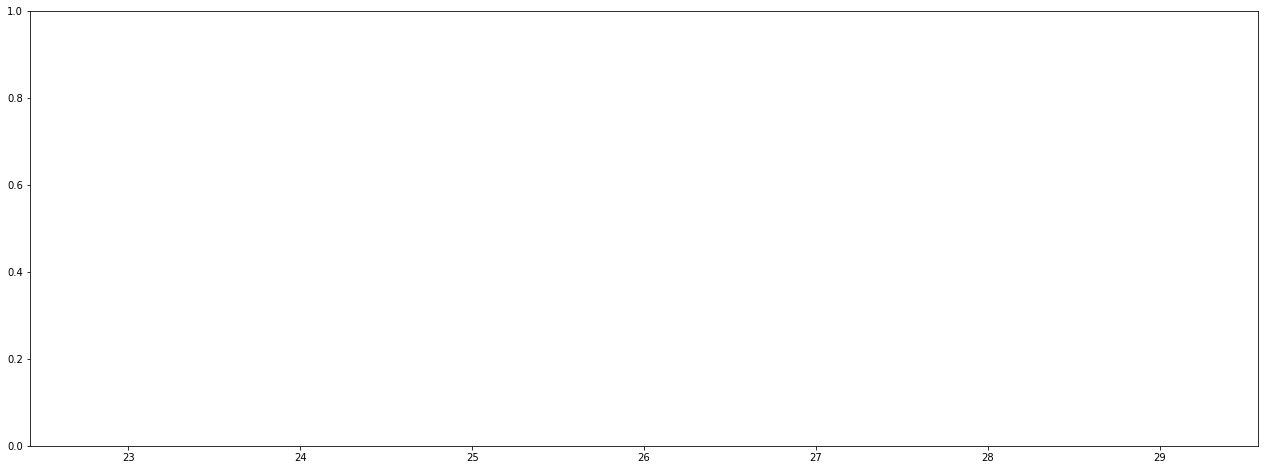

In [44]:
comp.plot(subplot=True, figsize=(22,8))

In [ ]:
MLR = ML['Close'].pct_change() ### retorno da ação: estou pedindo aqui as mudanças percentuais (de um dia para outro) no preço de fechamento.

In [ ]:
MLR.head()

Date
2019-01-02         NaN
2019-01-03   -0.010699
2019-01-04   -0.030435
2019-01-07    0.015527
2019-01-08   -0.008059
Name: Close, dtype: float64

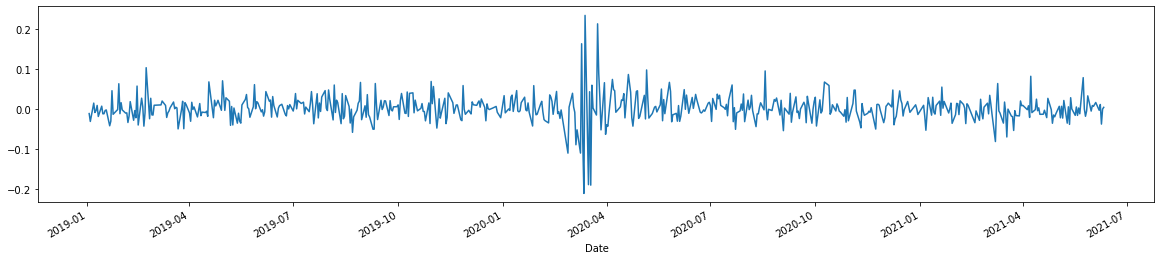

In [ ]:
MLR.plot(figsize=(20,4)) ### notem como a série ficou "diferenciada".

In [ ]:
PT = wb.DataReader("PETR4.SA", data_source ='yahoo', start = '2019-1-1') ### pegando dados da ação da Petrobrás.

[*********************100%***********************]  1 of 1 completed


In [ ]:
PT.tail() ### com os comandos tail ou head(), visualizamos os últimos ou primeiros valores do data frame (nossa tabela).

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-02,26.990000,28.490000,26.200001,28.360001,28.360001,191410300
2021-12-03,28.480000,28.940001,28.219999,28.760000,28.760000,105133000
2021-12-06,28.780001,29.270000,28.680000,28.889999,28.889999,66142300
2021-12-07,29.280001,29.490000,28.799999,29.250000,29.250000,76590800
2021-12-08,29.360001,30.070000,29.219999,29.540001,29.540001,40881100


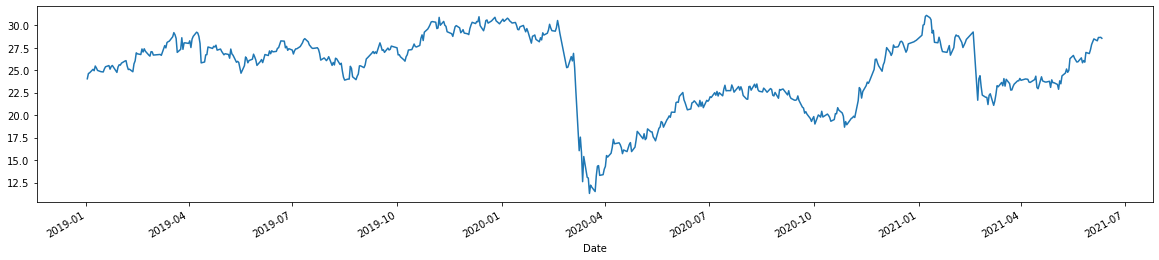

In [ ]:
PT['Close'].plot(figsize=(20,4))### gráfico do preço de fechamento das ações da Petrobrás.

In [ ]:
PTR = PT['Close'].pct_change()### retorno: preço venda de um dia - preço de venda do dia anterior, em termos percentuais.

In [ ]:
PTR.head() ### notem que se perde uma informação (a primeira) com essa operação.

Date
2020-01-02         NaN
2020-01-03   -0.008143
2020-01-06    0.011823
2020-01-07   -0.003895
2020-01-08   -0.006191
Name: Close, dtype: float64

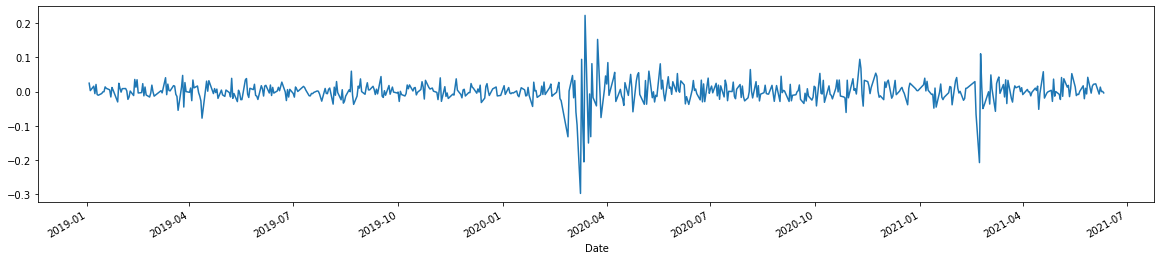

In [ ]:
PTR.plot(figsize=(20,4)) ### gráfico do retorno das ações da Petrobrás (ganhos de capital).

In [ ]:
MLR.std() ### Aqui estamos calculando o desvio padrão do retorno das ações do ML.

0.034623488500376595

In [ ]:
PTR.std() ### o mesmo para ações da Petrobrás. Notem que, por esse critério, as ações da Petrobraś são menos "arriscadas".

0.0332332341976338

In [ ]:
MLL = wb.DataReader("MGLU3.SA", data_source ='yahoo', start = '2012-1-1') ### ações no longo prazo.
PTL = wb.DataReader("PETR4.SA", data_source ='yahoo', start = '2012-1-1')


In [ ]:
MLLR = MLL['Close'].pct_change() ### variações percentuais no ganho de capital.
PTLR = PTL['Close'].pct_change()

In [ ]:
MLLR.head()

Date
2012-01-02         NaN
2012-01-03   -0.006452
2012-01-04   -0.009742
2012-01-05   -0.008743
2012-01-06    0.027565
Name: Close, dtype: float64

In [ ]:
MLLR.std() ### desvio padrão como medida do risco das ações do Magazine Luiza.

0.037717774333578535

In [ ]:
PTLR.std() ### desvio padrão como medida do risco das ações da Petrobrás.

0.031632575371282494

Notem que por um prazo mais longo, as ações da Petrobrás parecem ser mais seguras.

In [ ]:
IBV = pd.read_csv('ibv.csv', decimal = ',') ### IBOVESPA. Usando o argumento decimal, podemos ler csv em latim.

In [ ]:
IBV['data'] = pd.date_range(start='01/01/2010', periods=len(IBV), freq='M') ### acrescentando uma coluna de datas.

In [ ]:
IBV.head() ### peguei dados mensais. http://www.b3.com.br/pt_br/market-data-e-indices/indices/indices-amplos/indice-ibovespa-ibovespa-estatisticas-historicas.htm

,ibovespam,data
0,65401,2010-01-31
1,66503,2010-02-28
2,70371,2010-03-31
3,67529,2010-04-30
4,63046,2010-05-31


In [ ]:
IBVV = IBV['ibovespam'].pct_change() ### extraindo a variação percental nos valores do IBV, ou seja procurando seu retorno.

In [ ]:
IBVV

0           NaN
1      0.016850
2      0.058163
3     -0.040386
4     -0.066386
         ...   
131    0.092972
132   -0.033189
133   -0.043731
134    0.059963
135    0.019377
Name: ibovespam, Length: 136, dtype: float64

In [ ]:
IBVV.std()

0.06423689328117016

In [ ]:
IBVV.mean() ### rendimento médio mensal.

0.006543804876833525

Coletando dados e montando gráfico pelo smartphone.

In [ ]:
VL = wb.DataReader("VALE3.SA", data_source ='yahoo', start = '2020-1-1')

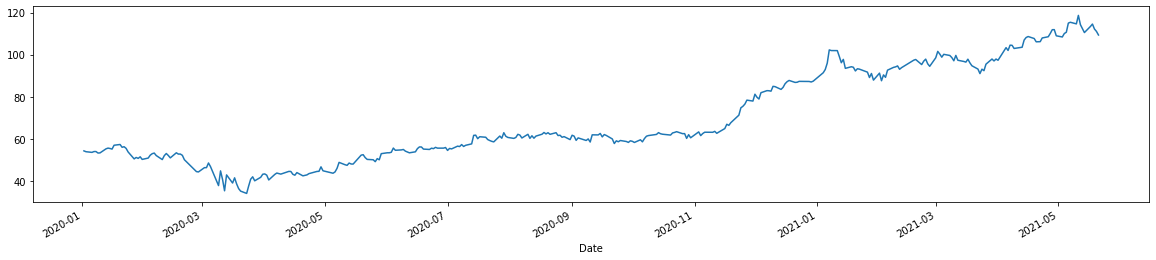

In [ ]:
 VL['Close'].plot(figsize=(20,4))

**Montando carteiras**

In [ ]:
carteira = ['BBAS3.SA', 'VALE3.SA', 'DTEX3.SA', 'MDIA3.SA', 'MGLU3.SA'] ### escolhendo as ações que farão parte de minha carteira.

In [ ]:
bancodedados = pd.DataFrame() ### criando um data frame para abrigar as ações.

In [ ]:
for i in carteira: ### pegando dados sobre o preço de fechamento das ações.
  bancodedados[i] = wb.DataReader(i, data_source= 'yahoo', start= '2018-1-1')['Close'] ### criando uma fórmula recorrente para fazer tudo de uma vez só.

In [ ]:
bancodedados.info() ### informações sobre o nosso banco de dados.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 840 entries, 2018-01-02 to 2021-06-01
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BBAS3.SA  840 non-null    float64
 1   VALE3.SA  840 non-null    float64
 2   DTEX3.SA  840 non-null    float64
 3   MDIA3.SA  840 non-null    float64
 4   MGLU3.SA  840 non-null    float64
dtypes: float64(5)
memory usage: 39.4 KB


In [ ]:
bancodedados.tail() ### últimas informações disponíveis.

,BBAS3.SA,VALE3.SA,DTEX3.SA,MDIA3.SA,MGLU3.SA
Date,,,,,
2021-05-26,32.980000,110.199997,21.309999,27.490000,19.67
2021-05-27,33.430000,110.989998,20.610001,27.740000,19.59
2021-05-28,33.540001,111.589996,20.660000,28.299999,20.25
2021-05-31,33.490002,114.779999,20.580000,29.290001,20.16
2021-06-01,33.980000,113.199997,21.530001,29.690001,20.35


Vamos calcular o retorno das ações da carteira: *retorno = (valor de hoje/valor de ontem) - 1*.

In [ ]:
retornos = (bancodedados/bancodedados.shift(1)) - 1 ### notem que vamos perder a primeira informação.

In [ ]:
retornos.head()

,BBAS3.SA,VALE3.SA,DTEX3.SA,MDIA3.SA,MGLU3.SA
Date,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN
2018-01-03,0.012754,-0.005992,0.018182,0.007122,-0.012610
2018-01-04,0.009595,0.004099,0.025210,0.013750,0.024010
2018-01-05,0.000000,0.015610,0.004098,-0.004844,-0.019706
2018-01-08,0.002376,0.022227,-0.003061,-0.018692,0.000127


Vamos distribuir pesos (iguais) às ações para se compor, efetivamente, a carteira.

In [ ]:
pesos = np.array([0.2, 0.2, 0.2, 0.2, 0.2]) ### pesos de 20%.

In [ ]:
retcarteira = np.dot(retornos, pesos) ### aqui estamos multiplicando a matriz de retornos por seus respectivos pesos.

In [ ]:
retcarteiradf = pd.DataFrame(retcarteira) ### estamos aqui criando uma tabela com o resultado acima.

In [ ]:
retcarteiradf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       839 non-null    float64
dtypes: float64(1)
memory usage: 6.7 KB


In [ ]:
retcarteiradf.head()

,0
0,NaN
1,0.003891
2,0.015333
3,-0.000968
4,0.000596


In [ ]:
retcarteiradf.std() ### calculando o desvio padrão (nossa medida de risco) para a carteira.

0    0.021602
dtype: float64

Vamos comparar o devio-padrão da carteira com os das ações.

In [ ]:
retornos['MGLU3.SA'].std() ### desvio padrão (risco) da ação da Magazine Luiza.

0.03355155126138057

In [ ]:
retornos['MDIA3.SA'].std() ### desvio padrão (risco) da ação da M Dias Branco.

0.024405888562066935

In [ ]:
retornos['DTEX3.SA'].std() ### desvio padrão (risco) da ação da Duratex.

0.03103840722903079

In [ ]:
retornos['VALE3.SA'].std() ### desvio padrão (risco) da ação da Vale.

0.027134309518373267

In [ ]:
retornos['BBAS3.SA'].std() ### desvio padrão (risco) da ação do Banco do Brasil.

0.028543545901684893

Logo, o desvio padrão (medida do risco) da carteira é menor do que os desvio padrão de cada ação individual.

Vamos calcular o retorno médio da carteira

In [ ]:
mediacarteira = retornos.mean()*100 ### vezes cem para termos os valores em porcentagem.

In [ ]:
mediacarteira ### calculamos o retorno médio diário de cada ação da carteira.

BBAS3.SA    0.044540
VALE3.SA    0.156197
DTEX3.SA    0.148141
MDIA3.SA   -0.033507
MGLU3.SA    0.307365
dtype: float64

In [ ]:
np.dot(mediacarteira, pesos) ### retorno médio total da carteira. Atenção: estamos falando aqui de retorno diário médio em %.

0.12454711872542666

Na carteira, as ações têm o mesmo peso. Podemos ver o rendimento médio por ação para reponderar a carteira.

In [ ]:
mediacarteira = retornos.mean()*100 ### retorno médio diário de cada ação, ou seja, sem os pesos.
print(mediacarteira)

BBAS3.SA    0.044540
VALE3.SA    0.156197
DTEX3.SA    0.148141
MDIA3.SA   -0.033507
MGLU3.SA    0.307365
dtype: float64


In [ ]:
### Segundo os números acima, podemos reduzir os pesos das ações do BB e da M Dias Branco. Aumentando o peso da Magalu.

In [ ]:
peso2 = np.array([0.1, 0.2, 0.1, 0.1, 0.5])

In [ ]:
np.dot(mediacarteira, peso2) ### valores médios (1 X 5) x pesos2 (5 X 1)

0.20083909442009043

Ou seja, aumentando a participação das ações que mais rendem e diminuindo as de menor rendimento, melhoramos o redimento total das carteiras.
